<a href="https://colab.research.google.com/github/tuxlimr/Celery_Preprocessing/blob/master/LSTM_sbin_ns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
df = yf.download("SBIN.NS", period="5y")

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-05,286.450012,300.000000,283.500000,294.950012,282.275635,44619891
2018-11-06,296.100006,298.299988,283.899994,286.450012,274.140900,40688243
2018-11-07,288.899994,288.899994,285.950012,286.549988,274.236572,3312160
2018-11-09,287.000000,287.500000,282.450012,283.250000,271.078400,19201007
2018-11-12,283.700012,283.700012,276.850006,277.950012,266.006165,24044907


<Axes: xlabel='Date'>

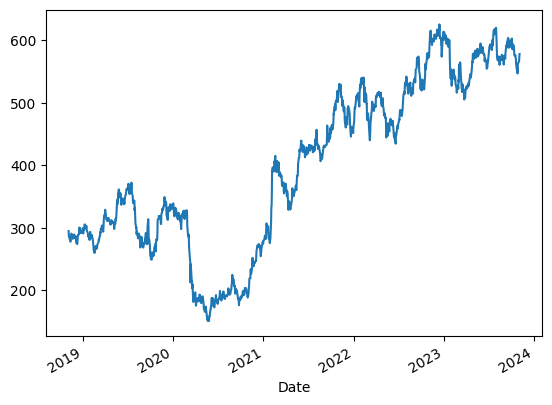

In [27]:
df.Close.plot()

In [28]:
df2 = df.Close

In [29]:
df2

Date
2018-11-05    294.950012
2018-11-06    286.450012
2018-11-07    286.549988
2018-11-09    283.250000
2018-11-12    277.950012
                 ...    
2023-10-30    565.200012
2023-10-31    565.549988
2023-11-01    566.400024
2023-11-02    572.099976
2023-11-03    578.150024
Name: Close, Length: 1236, dtype: float64

In [30]:
df2.reset_index(drop=True, inplace=True)

In [31]:
df2

0       294.950012
1       286.450012
2       286.549988
3       283.250000
4       277.950012
           ...    
1231    565.200012
1232    565.549988
1233    566.400024
1234    572.099976
1235    578.150024
Name: Close, Length: 1236, dtype: float64

In [32]:
df2.shape

(1236,)

In [33]:
df = pd.DataFrame(df2)
df

,Close
0,294.950012
1,286.450012
2,286.549988
3,283.250000
4,277.950012
...,...
1231,565.200012
1232,565.549988
1233,566.400024
1234,572.099976


### Train Test Split

In [34]:
train = df.iloc[:1220]
test = df.iloc[1220:]

In [35]:
train.shape

(1220, 1)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(train)

MinMaxScaler()

In [39]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [40]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## Creating the Model

In [41]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [42]:
length =16
batch_size = 32


In [46]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length= length, batch_size= batch_size)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [48]:
n_features =1


In [72]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991 (3.87 KB)
Trainable params: 991 (3.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model.fit_generator(generator, epochs=10, shuffle=False)

<ipython-input-74-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


Epoch 1/10
38/38 [==============================] - 1s 5ms/step - loss: 0.0189
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 8/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 9/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 10/10
38/38 [==============================] - 0s 5ms/step - loss: 0.0048


### Losses - model.history.history will give you about the loss function

In [75]:
losses = pd.DataFrame(model.history.history)

In [76]:
losses

,loss
0,0.018851
1,0.010335
2,0.011164
3,0.010762
4,0.009319
5,0.006299
6,0.005142
7,0.005966
8,0.005074
9,0.004804


<Axes: >

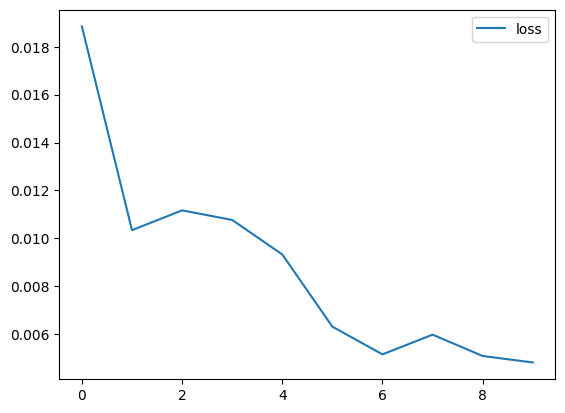

In [77]:
losses.plot()

### Evaluate Data Set

In [78]:
first_eval_batch = scaled_train[-length:]

### These are my last 16 values in dataset

In [79]:
first_eval_batch

array([[0.95459815],
       [0.94859365],
       [0.92131049],
       [0.94237865],
       [0.93374062],
       [0.93447809],
       [0.92468134],
       [0.92510273],
       [0.94322129],
       [0.95249133],
       [0.91730749],
       [0.92973775],
       [0.93416201],
       [0.9148846 ],
       [0.92868434],
       [0.92173175]])

In [80]:
first_eval_batch = first_eval_batch.reshape((1, length, 1))

In [81]:
first_eval_batch

array([[[0.95459815],
        [0.94859365],
        [0.92131049],
        [0.94237865],
        [0.93374062],
        [0.93447809],
        [0.92468134],
        [0.92510273],
        [0.94322129],
        [0.95249133],
        [0.91730749],
        [0.92973775],
        [0.93416201],
        [0.9148846 ],
        [0.92868434],
        [0.92173175]]])

In [82]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 149ms/step


array([[0.907026]], dtype=float32)

In [86]:
test_predictions = []

In [87]:
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 35ms/step


In [88]:
test_predictions

[array([0.907026], dtype=float32),
 array([0.8944429], dtype=float32),
 array([0.88074], dtype=float32),
 array([0.88105786], dtype=float32),
 array([0.86751425], dtype=float32),
 array([0.8530848], dtype=float32),
 array([0.85150015], dtype=float32),
 array([0.8476207], dtype=float32),
 array([0.83310455], dtype=float32),
 array([0.83720684], dtype=float32),
 array([0.82912755], dtype=float32),
 array([0.8238816], dtype=float32),
 array([0.8239471], dtype=float32),
 array([0.8177093], dtype=float32),
 array([0.8249875], dtype=float32),
 array([0.81922245], dtype=float32)]

### After you get ur reqd. predictions then you may need to get the scaled value back to original value


In [89]:
true_predictions = scaler.inverse_transform(test_predictions)

In [90]:
true_predictions

array([[581.36988808],
       [575.39733068],
       [568.89323551],
       [569.04411325],
       [562.61564083],
       [555.76670246],
       [555.01454878],
       [553.17317835],
       [546.28307607],
       [548.23022784],
       [544.39539271],
       [541.90541492],
       [541.93647881],
       [538.97573305],
       [542.43030423],
       [539.69393712]])

In [91]:
test['predictions'] = true_predictions

<ipython-input-91-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [92]:
test

,Close,predictions
1220,586.049988,581.369888
1221,576.150024,575.397331
1222,575.650024,568.893236
1223,576.450012,569.044113
1224,572.650024,562.615641
1225,571.200012,555.766702
1226,563.099976,555.014549
1227,552.950012,553.173178
1228,556.200012,546.283076
1229,547.000000,548.230228


<Axes: >

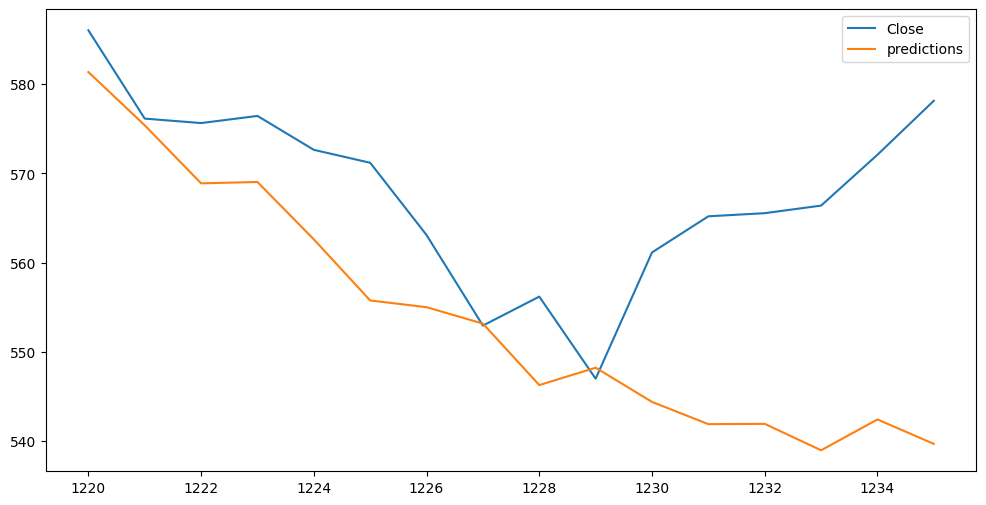

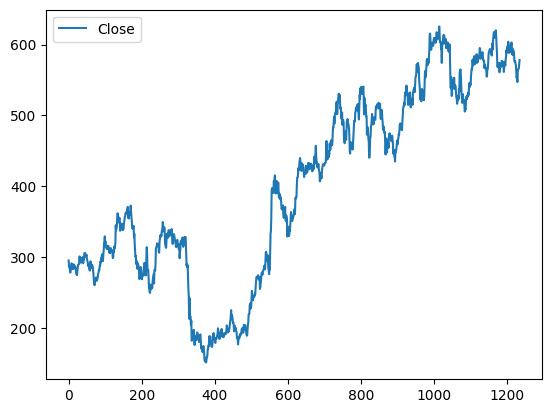

In [94]:
test.plot(figsize=(12,6))
df.plot()

### Let's create now full model


In [96]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [97]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length= length, batch_size= 32)

In [98]:
model= Sequential()
model.add(SimpleRNN(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [99]:
model.fit_generator(generator, epochs=10, shuffle=False)

Epoch 1/10


<ipython-input-99-a216c16f3d95>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=10, shuffle=False)


39/39 [==============================] - 1s 5ms/step - loss: 0.0974
Epoch 2/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0764
Epoch 3/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0379
Epoch 4/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0352
Epoch 5/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 6/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0123
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 8/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 9/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0074
Epoch 10/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0070


In [100]:
losses = pd.DataFrame(model.history.history)

<Axes: >

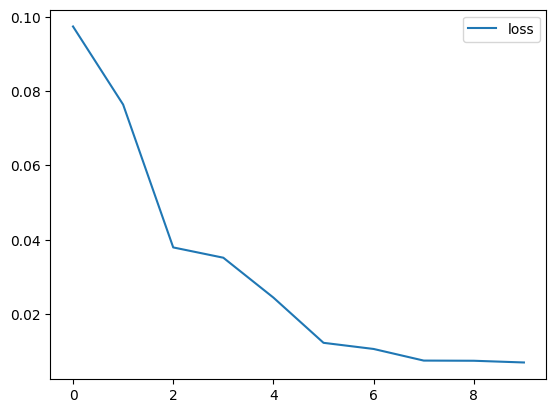

In [101]:
losses.plot()

In [102]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(20):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 22ms/step


In [103]:
forecast = scaler.inverse_transform(forecast)

In [104]:
forecast

array([[589.23881429],
       [587.33967293],
       [585.15855174],
       [589.65868613],
       [582.51359397],
       [587.3152575 ],
       [586.69692188],
       [581.49055067],
       [585.28447652],
       [585.62357657],
       [583.95353852],
       [582.44719418],
       [584.67468488],
       [584.15084235],
       [581.24418964],
       [583.92903821],
       [583.88781772],
       [581.89010932],
       [582.12498406],
       [583.83683672]])

In [105]:
forecast.flatten()

array([589.23881429, 587.33967293, 585.15855174, 589.65868613,
       582.51359397, 587.3152575 , 586.69692188, 581.49055067,
       585.28447652, 585.62357657, 583.95353852, 582.44719418,
       584.67468488, 584.15084235, 581.24418964, 583.92903821,
       583.88781772, 581.89010932, 582.12498406, 583.83683672])

In [106]:
df_array = np.array(df)
df_array

array([[294.95001221],
       [286.45001221],
       [286.54998779],
       ...,
       [566.40002441],
       [572.09997559],
       [578.15002441]])

In [110]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

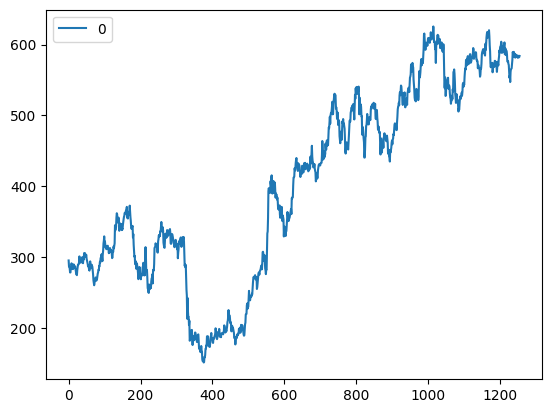

In [111]:
full_data.plot()

## LSTM

In [124]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [125]:
length =16


In [126]:
scaled_test.shape

(16, 1)

In [127]:
length =15

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=32)






In [128]:
model= Sequential()
model.add(LSTM(30, input_shape=(length, n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

In [129]:
model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)

Epoch 1/20


<ipython-input-129-4612b74385c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=20,validation_data=validation_generator, callbacks=[early_stop], shuffle=False)


38/38 [==============================] - 4s 23ms/step - loss: 0.0202 - val_loss: 2.4911e-04
Epoch 2/20
38/38 [==============================] - 0s 10ms/step - loss: 0.0152 - val_loss: 0.0092
Epoch 3/20
38/38 [==============================] - 1s 15ms/step - loss: 0.0101 - val_loss: 0.0019


In [130]:
losses = pd.DataFrame(model.history.history)

<Axes: >

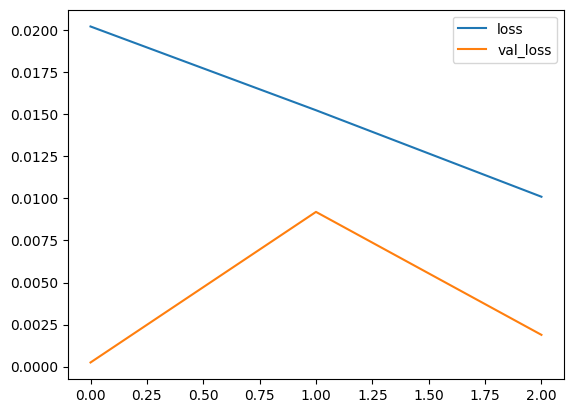

In [131]:
losses.plot()

In [132]:
len(test)

16

In [133]:



test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 24ms/step


<ipython-input-135-0c99d0b30835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

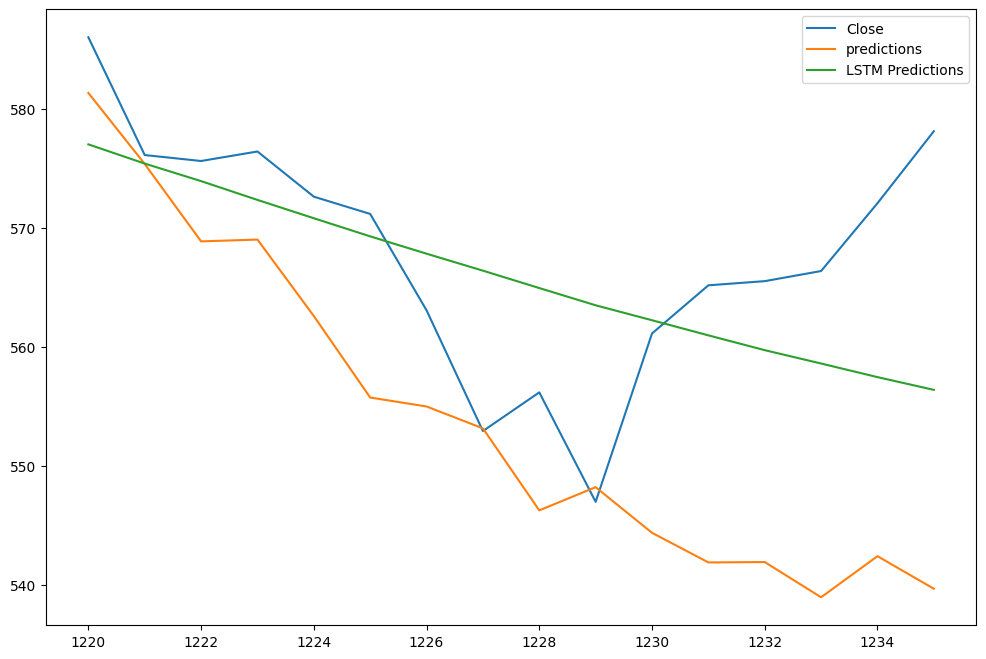

In [135]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [139]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(15):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 23ms/step


In [140]:
forecast = scaler.inverse_transform(forecast)

In [141]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

<Axes: >

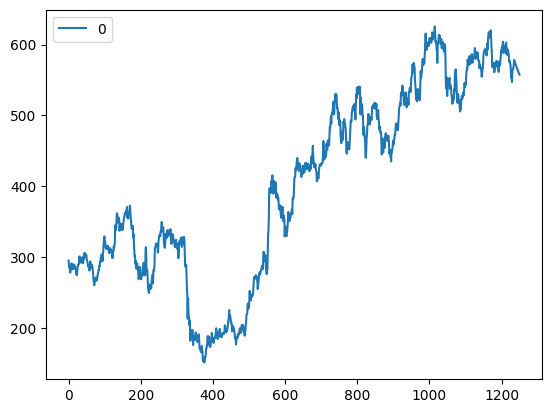

In [142]:
full_data.plot()

In [143]:
forecast

array([[577.047876  ],
       [575.43300607],
       [573.95871583],
       [572.37836134],
       [570.83829372],
       [569.31429559],
       [567.85771573],
       [566.43118127],
       [564.97013138],
       [563.5208224 ],
       [562.26389455],
       [560.99369807],
       [559.74856771],
       [558.62579743],
       [557.4832232 ]])

In [144]:
full_data.tail(30)

,0
1221,576.150024
1222,575.650024
1223,576.450012
1224,572.650024
1225,571.200012
1226,563.099976
1227,552.950012
1228,556.200012
1229,547.000000
1230,561.150024
